### Grain size distribution for each Yerba Mate granulometry

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_1 = pd.read_csv('coarse\dimensions_YM2_gruesa_297x210.jpg.csv')
df_2 = pd.read_csv('medium\dimensions_YM2_medium_297x210.jpg.csv')
df_3 = pd.read_csv('fine\dimensions_YM2_fine_297x210.jpg.csv')
df_4 = pd.read_csv('extrafine\dimensions_YM2_extrafine_200x150.jpg.csv')

df_tot = pd.concat([df_1, df_2, df_3, df_4])
df_1


,length,width,granulometry
0,1.100478,6.538462,coarse
1,3.062201,3.942308,coarse
2,4.114833,6.442308,coarse
3,3.444976,5.288462,coarse
4,3.014354,3.557692,coarse
...,...,...,...
599,4.114833,7.115385,coarse
600,14.354067,12.644231,coarse
601,5.502392,8.028846,coarse
602,9.808612,9.759615,coarse


Processing group: coarse
Processing group: extrafine
Processing group: fine
Processing group: medium


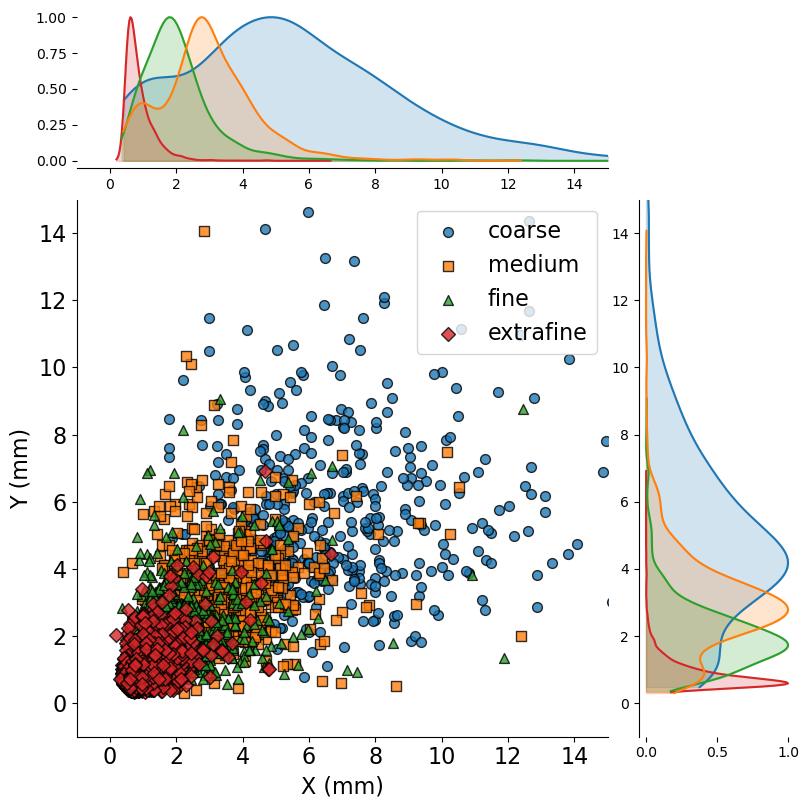

In [41]:
from scipy.stats import gaussian_kde
# fig, ax = plt.subplots(2, 2, figsize=(10,10))
# ax = ax.flatten()

#g = sns.jointplot(data=df_tot, x='width', y='length',hue='granulometry', kind='scatter', ratio=3, marginal_kws={})

# Create jointplot
g = sns.jointplot(
    data=df_tot,
    x='width',
    y='length',
    hue='granulometry',
    kind='scatter',
    height=8,
    ratio=3,
    palette='deep',
    s=50,  # Size of the markers
    linewidth=0.5,
    marker='o',
    edgecolor='black',
    alpha=0.8,
    legend=False,

)

# Access the marginal axes
ax_marg_x = g.ax_marg_x
ax_marg_y = g.ax_marg_y

# Clear marginal axes
ax_marg_x.clear()
ax_marg_y.clear()

# Plot KDEs for each 'granulometry' group
colors = [sns.color_palette()[0], sns.color_palette()[3], sns.color_palette()[2], sns.color_palette()[1]]

def plot_normalized_kde(ax, data, orientation='horizontal', color='blue'):
    # Compute KDE
    kde = gaussian_kde(data)
    # Generate x or y values for plotting
    if orientation == 'horizontal':
        x_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(x_vals)
        # Normalize to max=1
        kde_vals /= kde_vals.max()
        # Fill with lighter color first
        ax.fill_between(x_vals, 0, kde_vals, color=color, alpha=0.2)
        # Plot main line
        ax.plot(x_vals, kde_vals, color=color)
        ax.set_xlabel('Width (mm)')
        ax.set_ylabel('Density (normalized)')
    else:
        y_vals = np.linspace(data.min(), data.max(), 200)
        kde_vals = kde(y_vals)
        kde_vals /= kde_vals.max()
        # Fill with lighter color first
        ax.fill_betweenx(y=y_vals, x1=0, x2=kde_vals, color=color, alpha=0.2)
        # Plot main line
        ax.plot(kde_vals, y_vals, color=color)
        ax.set_ylabel('Length (mm)')
        ax.set_xlabel('Density (normalized)')



for i, (group, group_df) in enumerate(df_tot.groupby('granulometry')):
    print(f"Processing group: {group}")
    # Plot for x margin
    plot_normalized_kde(ax_marg_x, group_df['width'], orientation='horizontal', color=colors[i])
    # Plot for y margin
    plot_normalized_kde(ax_marg_y, group_df['length'], orientation='vertical', color=colors[i])


# Remove existing scatter plots
for artist in g.ax_joint.collections:
    artist.set_visible(False)

# Define marker styles for each 'granulometry' group
markers = {'coarse': 'o', 'medium': 's', 'fine': '^', 'extrafine': 'D'}  # adjust categories accordingly

# Plot points manually for each 'granulometry' group with specific markers
for i, (group_value, marker_shape) in enumerate(markers.items()):
    group_df = df_tot[df_tot['granulometry'] == group_value]
    g.ax_joint.scatter(
        group_df['width'],
        group_df['length'],
        marker=marker_shape,
        label=group_value,
        edgecolor='black',
        color=sns.color_palette()[i],
        s=50,
        alpha=0.8
    )



fontsize = 16
#plt.xlim(0, 16)
#plt.ylim(0, 16)
# plt.yscale('log')
# plt.xscale('log')
plt.xlim([-1, 15])
plt.ylim([-1, 15])
plt.xlabel('X (mm)', fontsize=fontsize)
plt.ylabel('Y (mm)', fontsize=fontsize)
plt.legend(fontsize=fontsize, title_fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
# ax_marg_x.spines['right'].set_color('lightgrey')
# plt.spines['top'].set_color('lightgrey')
plt.show()

In [29]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

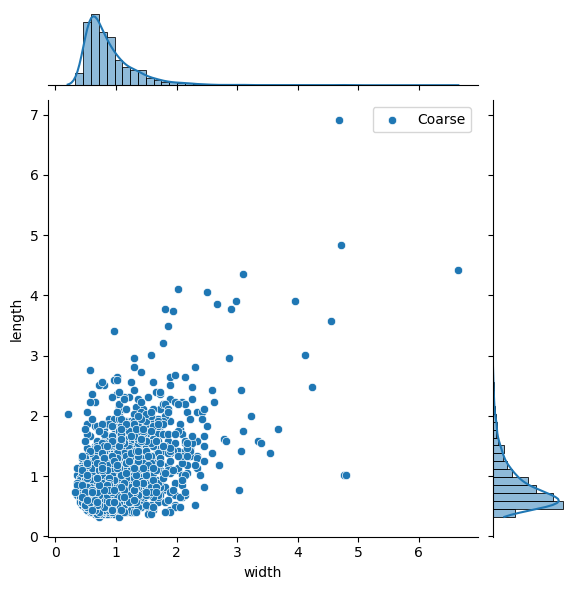

In [30]:
# K-MEANS to find clusters 

sns.jointplot(data=df_4, x='width', y='length', kind='scatter',  marginal_kws=dict(bins=50, kde=True), label=f'Coarse')

Number of clusters found: 2
Number of noise/outliers: 256 out of 949 (26.98%)


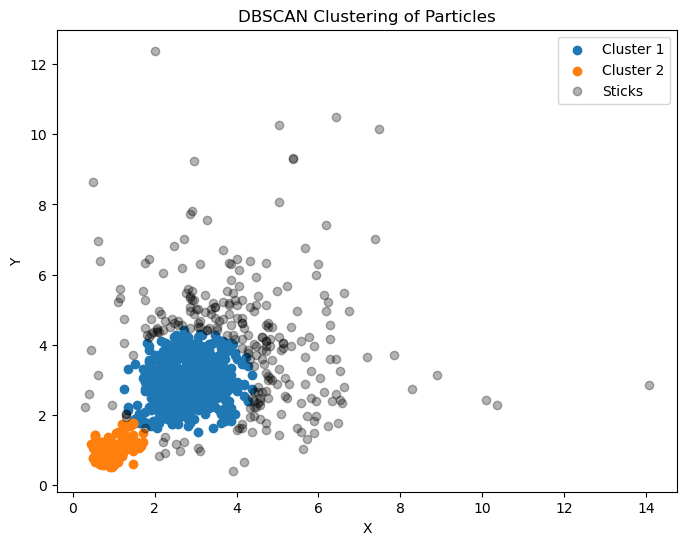


Cluster Summary:
   Cluster  Count Percentage  Mean Length  Mean Width  Aspect_ratio
0        1    550     57.96%         2.83        2.94          1.28
1        2    143     15.07%         0.90        0.96          1.33
2        0    256     26.98%         4.14        4.17          2.19


In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

dataset = df_2  # Use df_1 or any other DataFrame with 'length' and 'width'
# Your data:
data = dataset[['length', 'width']].values  # assuming df_1 has 'length' and 'width'

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply DBSCAN
# Adjust eps and min_samples as needed
dbscan = DBSCAN(eps=0.5, min_samples=140)
# df_1 --> eps=0.5, min_samples=80
# df_2 --> eps=0.5, min_samples=140
# df_3 --> eps=0.3, min_samples=78
# df_4 --> eps=0.6, min_samples=20
labels = dbscan.fit_predict(scaled_data)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Number of clusters found: {n_clusters}')

# Count noise points
n_noise = np.sum(labels == -1)
total_points = len(data)
print(f'Number of noise/outliers: {n_noise} out of {total_points} ({n_noise/total_points*100:.2f}%)')

# Plot clustering results
plt.figure(figsize=(8,6))
palette = sns.color_palette('tab10', n_colors=n_clusters)
for cluster_id in set(labels):
    if cluster_id == -1:
        plt.scatter(data[labels == cluster_id, 0], data[labels == cluster_id, 1], color='k', alpha=0.3, label='Sticks')
    else:
        plt.scatter(
            data[labels == cluster_id, 0],
            data[labels == cluster_id, 1],
            label=f'Cluster {cluster_id+1}',
            color=palette[cluster_id % len(palette)]
        )

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering of Particles')
plt.legend()
plt.show()

# Generate cluster summaries
import pandas as pd

# Create DataFrame with original data and labels
df_clusters = dataset.copy()
df_clusters['cluster'] = labels

# Filter out noise if desired
clusters = set(labels)
# if -1 in clusters:
#     clusters.remove(-1)

# Prepare summary list
summary_list = []

for cluster_id in (clusters):
    cluster_points = df_clusters[df_clusters['cluster'] == cluster_id]
    count = len(cluster_points)
    mean_length = round(cluster_points['length'].mean(), 2)
    mean_width = round(cluster_points['width'].mean(), 2)

    list_dimensions = list(zip(cluster_points['length'], cluster_points['width']))
    ratio = [max(dim)/min(dim) for dim in list_dimensions]
    aspect_ratio = round(np.mean(ratio), 2)
        
    summary_list.append({
        'Cluster': cluster_id+1,  # +1 for human-friendly numbering
        'Count': count,
        'Percentage': f'{round(count / total_points * 100, 2)}%',
        'Mean Length': mean_length,
        'Mean Width': mean_width,
        'Aspect_ratio': aspect_ratio
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary_list)
print("\nCluster Summary:")
print(summary_df)

Number of clusters found: 2
Number of noise/outliers: 191 out of 604 (31.62%)

Cluster coarse Summary:
   Cluster  Count Percentage  Mean Length  Mean Width  Aspect_ratio
0        1    318      53.0%         5.43        3.99          1.40
1        2     95      16.0%         1.21        0.89          1.40
2        0    191      32.0%        10.04        5.57          2.18
Number of clusters found: 2
Number of noise/outliers: 256 out of 949 (26.98%)

Cluster medium Summary:
   Cluster  Count Percentage  Mean Length  Mean Width  Aspect_ratio
0        1    550      58.0%         3.21        2.56          1.28
1        2    143      15.0%         1.05        0.81          1.33
2        0    256      27.0%         5.28        3.02          2.19
Number of clusters found: 2
Number of noise/outliers: 369 out of 1080 (34.17%)

Cluster fine Summary:
   Cluster  Count Percentage  Mean Length  Mean Width  Aspect_ratio
0        1    573      53.0%         2.03        1.61          1.29
1        2  

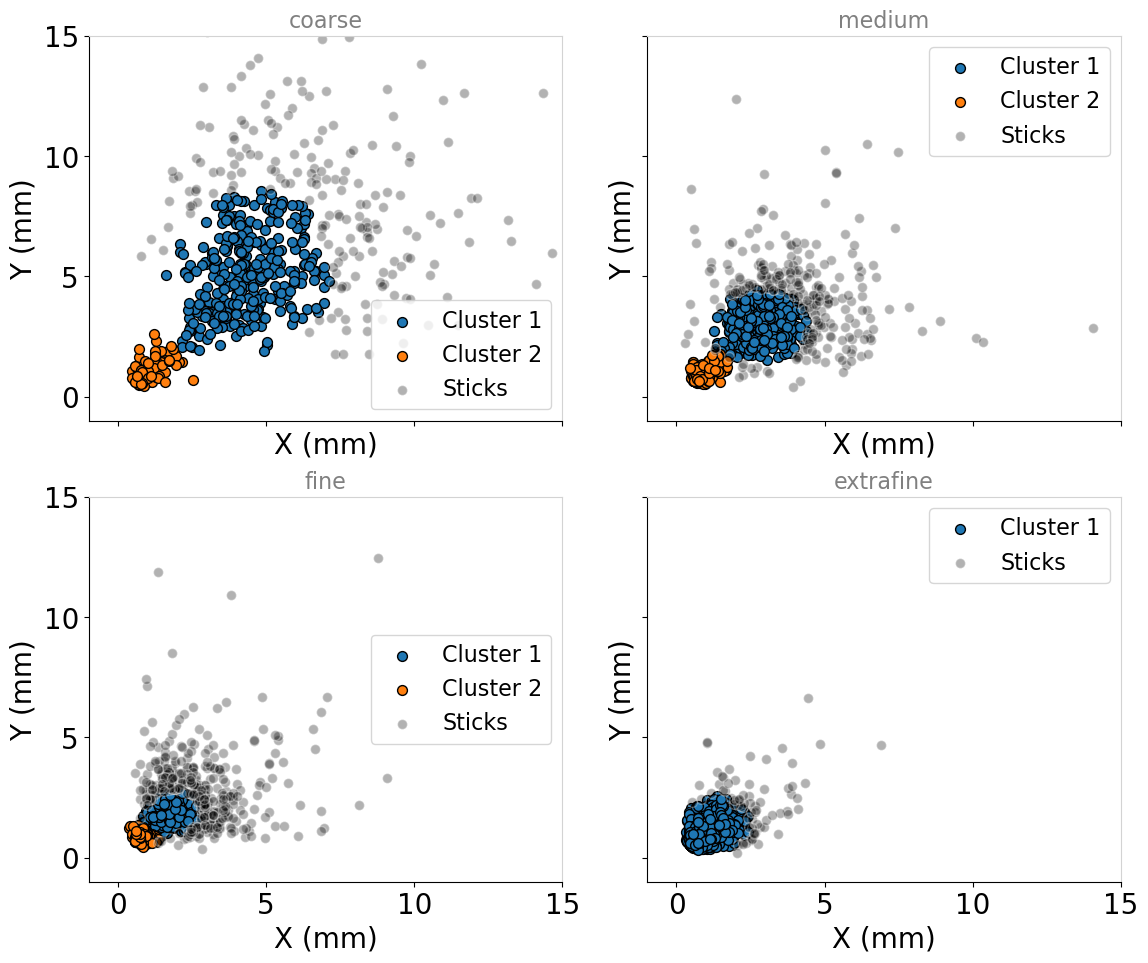

In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


fig, ax = plt.subplots(2, 2, figsize=(12,10), sharex=True, sharey=True)
fig.tight_layout(pad=4.5)
ax = ax.flatten()  #Flatten the array of axes

params = {
    'eps': [0.5, 0.5, 0.34, 0.6],
    'min_samples': [80, 140, 100, 20] 
} 

for i, granul in enumerate(['coarse', 'medium', 'fine', 'extrafine']):
    dataset = df_tot[df_tot['granulometry'] == granul]  # Use df_1 or any other DataFrame with 'length' and 'width'

    # Your data:
    data = dataset[['length', 'width']].values  # assuming df_1 has 'length' and 'width'

    # Standardize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Apply DBSCAN
    # Adjust eps and min_samples as needed
    eps = params['eps'][i]
    min_samples = params['min_samples'][i]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    # df_1 --> eps=0.2, min_samples=15
    # df_2 --> eps=0.2, min_samples=20
    # df_3 --> eps=0.3, min_samples=78
    # df_4 --> eps=0.6, min_samples=20
    labels = dbscan.fit_predict(scaled_data)

    # Number of clusters (excluding noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f'Number of clusters found: {n_clusters}')

    # Count noise points
    n_noise = np.sum(labels == -1)
    total_points = len(data)
    print(f'Number of noise/outliers: {n_noise} out of {total_points} ({n_noise/total_points*100:.2f}%)')

    # Plot clustering results

    palette = sns.color_palette('tab10', n_colors=n_clusters)
    for cluster_id in set(labels):
        if cluster_id == -1:
            ax[i].scatter(data[labels == cluster_id, 0], data[labels == cluster_id, 1], color='k', alpha=0.3, label='Sticks', s=50, facecolor=None, edgecolor='white')
            
        else:
            ax[i].scatter(
                data[labels == cluster_id, 0],
                data[labels == cluster_id, 1],
                label=f'Cluster {cluster_id+1}',
                color=palette[cluster_id % len(palette)],
                facecolor=None, 
                s=50,
                edgecolor='black'
            )

    fontsize=20
    ax[i].set_xlabel('X (mm)', fontsize=fontsize)
    ax[i].set_ylabel('Y (mm)', fontsize=fontsize)
    ax[i].set_xlim([-1, 15])
    ax[i].set_ylim([-1, 15])
    ax[i].set_title(f'{granul}', fontsize=fontsize-4, color='grey')
    ax[i].legend(fontsize=fontsize-4)
    ax[i].tick_params(axis='both', labelsize=fontsize)
    ax[i].spines['right'].set_color('lightgrey')
    ax[i].spines['top'].set_color('lightgrey')
    

    # Generate cluster summaries
    import pandas as pd

    # Create DataFrame with original data and labels
    df_clusters = dataset.copy()
    df_clusters['cluster'] = labels

    
    # Filter out noise if desired
    clusters = set(labels)
    # if -1 in clusters:
    #     clusters.remove(-1)

    # Prepare summary list
    summary_list = []

    for cluster_id in clusters:
        cluster_points = df_clusters[df_clusters['cluster'] == cluster_id]
        count = len(cluster_points)
        mean_length = round(cluster_points['length'].mean(), 2)
        mean_width = round(cluster_points['width'].mean(), 2)

        list_dimensions = list(zip(cluster_points['length'], cluster_points['width']))
        ratio = [round(max(dim),2)/round(min(dim),2) for dim in list_dimensions]
        mean_length = [round(max(dim),2) for dim in list_dimensions]
        mean_width = [round(min(dim),2) for dim in list_dimensions]
        aspect_ratio = round(np.mean(ratio), 2)
        # aspect_ratio = round(np.mean(np.array(mean_length))/np.mean(np.array(mean_width)), 2)
            
        summary_list.append({
            'Cluster': cluster_id+1,  # +1 for human-friendly numbering
            'Count': count,
            'Percentage': f'{round(count / total_points * 100, 0)}%',
            'Mean Length': round(np.mean(mean_length), 2),
            'Mean Width': round(np.mean(mean_width), 2),
            'Aspect_ratio': aspect_ratio
        })

    # Convert to DataFrame
    summary_df = pd.DataFrame(summary_list)
    print(f"\nCluster {granul} Summary:")
    print(summary_df)

plt.show()

In [33]:
#sns.histplot(ratio, bins=50, kde=True)

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Your data:
# data = np.array([...]) or from your DataFrame
data = df_4[['length', 'width']].values  # Assuming df_4 has 'length' and 'width' columns

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine optimal k using silhouette score (including k=1)
K = range(1, 8)
silhouette_scores = []

for k in K:
    if k == 1:
        # Silhouette score is not defined for k=1
        silhouette_scores.append(np.nan)
        print(f'k={k} (single cluster): silhouette score not applicable')
        continue
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)
    print(f'k={k}, silhouette score={score:.3f}')

# Plot silhouette scores
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(K), y=silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.xticks(K)
plt.show()

# Choose best k (excluding k=1 if silhouette score is NaN)
valid_scores = [score if not np.isnan(score) else -1 for score in silhouette_scores]
best_k = K[np.argmax(valid_scores)]
print(f'Optimal number of clusters: {best_k}')

# Handle case when best_k=1
if best_k == 1:
    print("All data assigned to a single cluster.")
    cluster_labels = np.zeros(len(data), dtype=int)
else:
    # Apply KMeans with best_k
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

# Plot clusters with seaborn
plt.figure(figsize=(8, 6))
if best_k == 1:
    sns.scatterplot(x=data[:,0], y=data[:,1], color='blue', label='All Data')
else:
    palette = sns.color_palette('tab10', n_colors=best_k)
    for i in range(best_k):
        cluster_points = data[cluster_labels == i]
        sns.scatterplot(x=cluster_points[:,0], y=cluster_points[:,1], label=f'Cluster {i+1}', color=palette[i])

plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Particle Clusters')
plt.legend()
plt.show()

# Centroids
if best_k > 1:
    centroids_scaled = kmeans.cluster_centers_
    centroids = scaler.inverse_transform(centroids_scaled)
    for i, centroid in enumerate(centroids):
        print(f'Centroid of Cluster {i+1}: Length={centroid[0]:.2f}, Width={centroid[1]:.2f}')
    # Optional: classify clusters based on ratio
    ratios = centroids[:,0] / centroids[:,1]
    cluster_types = ['Stick' if ratio > 3 else 'Particle' for ratio in ratios]
    for i, ctype in enumerate(cluster_types):
        print(f'Cluster {i+1} is likely: {ctype}')
else:
    # Single cluster case
    centroid = np.mean(data, axis=0)
    print(f'Overall centroid: Length={centroid[0]:.2f}, Width={centroid[1]:.2f}')

k=1 (single cluster): silhouette score not applicable


c:\Users\J.Garcia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'